In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import poisson

In [2]:
def bp_cdf(x1, x2, l1, l2, theta):
    i = np.arange(x1 + 1)
    j = np.arange(x2 + 1)
    m1 = np.minimum.outer(poisson.cdf(i, theta * l1), poisson.cdf(j, theta * l2))
    m2 = np.multiply.outer(poisson.pmf(x1 - i, (1 - theta) * l1), poisson.pmf(x2 - j, (1 - theta) * l2))
    return (m1 * m2).sum()

def bp_pmf(x1, x2, l1, l2, theta):
    return bp_cdf(x1, x2, l1, l2, theta) \
            - bp_cdf(x1 - 1, x2, l1, l2, theta) \
            - bp_cdf(x1, x2 - 1, l1, l2, theta) \
            + bp_cdf(x1 - 1, x2 - 1, l1, l2, theta)

def bp_logpmf(x1, x2, l1, l2, theta):
    return np.log(bp_pmf(x1, x2, l1, l2, theta))

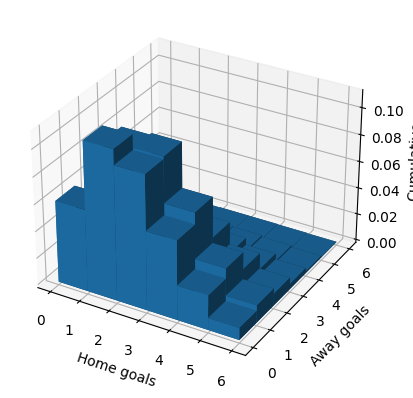

In [3]:
X, Y = 6, 6
x = np.arange(X)
y = np.arange(Y)
z = np.zeros((Y, X))
x, y = np.meshgrid(x, y)
x = x.flatten()
y = y.flatten()

l1, l2, theta = 2, 1, 0.2
for x_ in x:
    for y_ in y:
        z[y_, x_] = bp_pmf(x_, y_, l1, l2, theta)

z = z.flatten()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.bar3d(x, y, np.zeros(len(z)), 1, 1, z)
ax.set_xlabel('Home goals')
ax.set_ylabel('Away goals')
ax.set_zlabel('Cumulative')

plt.show()

In [4]:
import numpy as np
import plotly.graph_objects as go

X, Y = 6, 6
x = np.arange(X)
y = np.arange(Y)
z = np.zeros((Y, X))

x, y = np.meshgrid(x, y)
x_values = x.flatten()
y_values = y.flatten()
l1, l2, theta = 2, 1, 0.

for i in range(len(x_values)):
    z[y_values[i], x_values[i]] = bp_cdf(x_values[i], y_values[i], l1, l2, theta)

fig = go.Figure(data=[go.Scatter3d(x=x_values, y=y_values, z=z.flatten(), mode='markers')])

fig.update_layout(scene=dict(aspectmode='cube'))
fig.update_layout(scene=dict(xaxis_title='Home goals (x)', yaxis_title='Away goals (y)', zaxis_title='Cumulative'))
fig.show()